<a href="https://colab.research.google.com/github/dude123studios/AdvancedDeepLearning/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
points_n = 200
clusters_n = 3
iterations_n = 100
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
points = np.random.uniform(0, 10, (points_n, 2))
centroids = tf.slice(tf.random.shuffle(points),[0, 0], [clusters_n, -1])

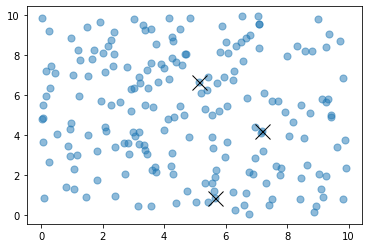

In [4]:
plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()

In [5]:
def closest_centroids(points, centroids):
    distances = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:, None])), 2)
    assignments = tf.argmin(distances, 0)
    return assignments

In [6]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [7]:
for step in range(iterations_n):
    closest = closest_centroids(points, centroids)
    centroids = move_centroids(points, closest, centroids)

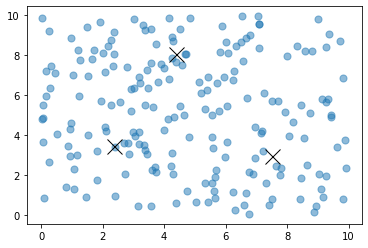

In [8]:
plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()